In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


data = pd.read_csv(r"C:\Users\prave\OneDrive\Documents\gym_members_exercise_tracking.csv")

data.columns
df = pd.DataFrame(data)
print(df.dtypes)

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


In [15]:


variables = ['Age', 'BMI', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Frequency (days/week)']


variable_descriptions = {
    'Age': 'Age of the customer  in years',
    'BMI': 'Body Mass Index',
    'Session_Duration (hours)': 'Duration of workout  in hours',
    'Calories_Burned': 'Number of calories burned during workouts',
    'Workout_Frequency (days/week)': 'Number of workout days per week'
}


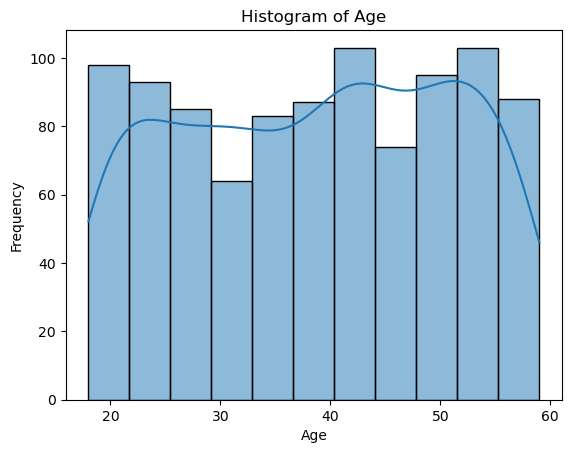

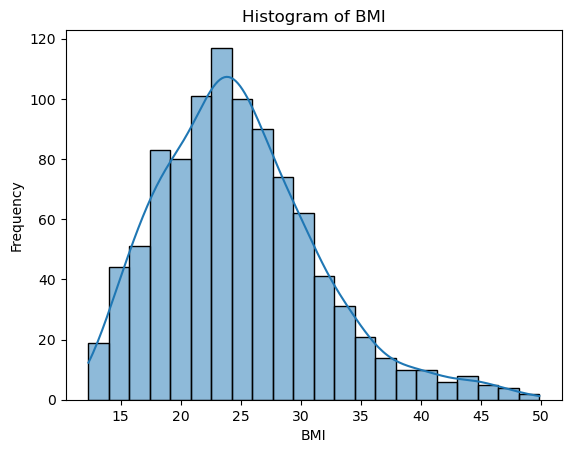

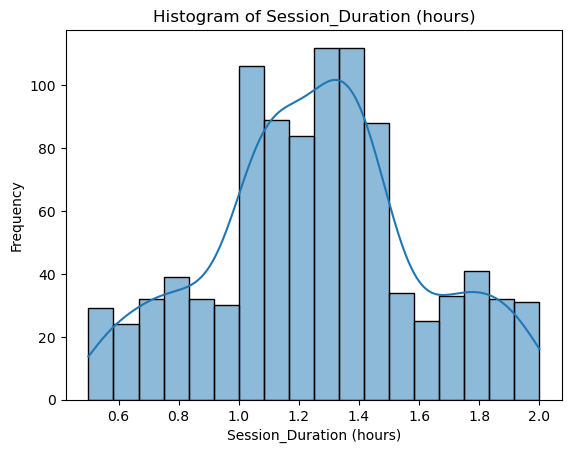

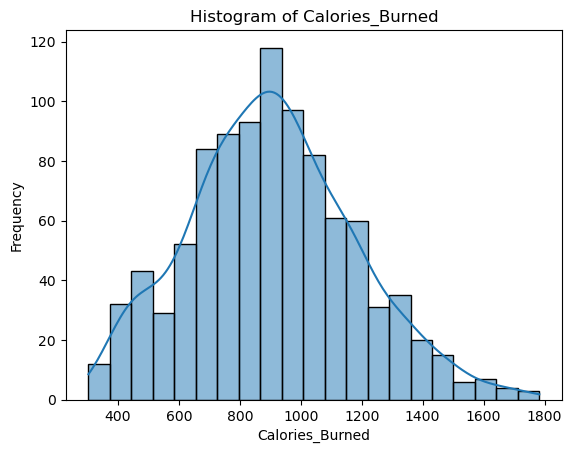

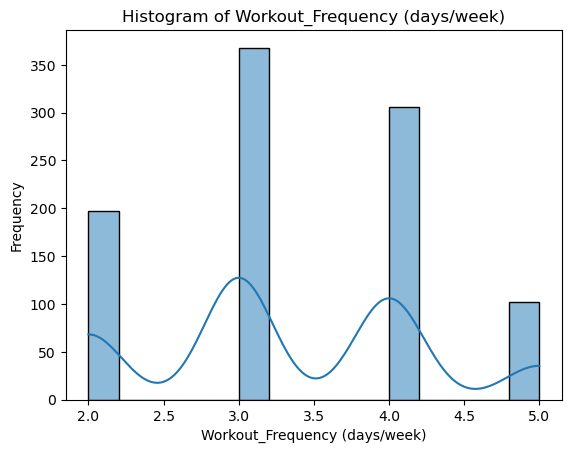

In [9]:

for var in variables:
    plt.figure()
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()



In [15]:
 
    z_scores = np.abs(stats.zscore(data[var].dropna()))
    outliers = data[var][z_scores > 3]
    print(f"Outliers in {var}:")
    print(outliers)



Outliers in Workout_Frequency (days/week):
Series([], Name: Workout_Frequency (days/week), dtype: int64)


In [17]:

descriptive_stats = data[variables].describe()
print("Descriptive Statistics:")
print(descriptive_stats)



Descriptive Statistics:
              Age         BMI  Session_Duration (hours)  Calories_Burned  \
count  973.000000  973.000000                973.000000       973.000000   
mean    38.683453   24.912127                  1.256423       905.422405   
std     12.180928    6.660879                  0.343033       272.641516   
min     18.000000   12.320000                  0.500000       303.000000   
25%     28.000000   20.110000                  1.040000       720.000000   
50%     40.000000   24.160000                  1.260000       893.000000   
75%     49.000000   28.560000                  1.460000      1076.000000   
max     59.000000   49.840000                  2.000000      1783.000000   

       Workout_Frequency (days/week)  
count                     973.000000  
mean                        3.321686  
std                         0.913047  
min                         2.000000  
25%                         3.000000  
50%                         3.000000  
75%               

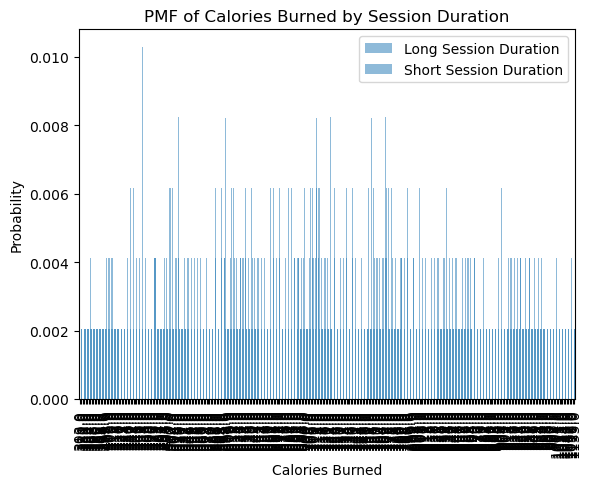

In [19]:

long_session = data[data['Session_Duration (hours)'] > data['Session_Duration (hours)'].median()]['Calories_Burned']
short_session = data[data['Session_Duration (hours)'] <= data['Session_Duration (hours)'].median()]['Calories_Burned']

pmf_long_session = long_session.value_counts(normalize=True).sort_index()
pmf_short_session = short_session.value_counts(normalize=True).sort_index()

plt.figure()
pmf_long_session.plot(kind='bar', alpha=0.5, label='Long Session Duration')
pmf_short_session.plot(kind='bar', alpha=0.5, label='Short Session Duration')
plt.title('PMF of Calories Burned by Session Duration')
plt.xlabel('Calories Burned')
plt.ylabel('Probability')
plt.legend()
plt.show()



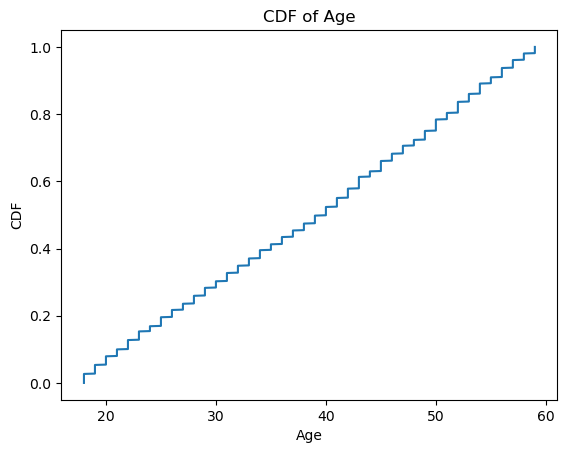

In [21]:

age_cdf = np.sort(data['Age'].dropna())
yvals = np.arange(len(age_cdf))/float(len(age_cdf)-1)

plt.figure()
plt.plot(age_cdf, yvals)
plt.title('CDF of Age')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()



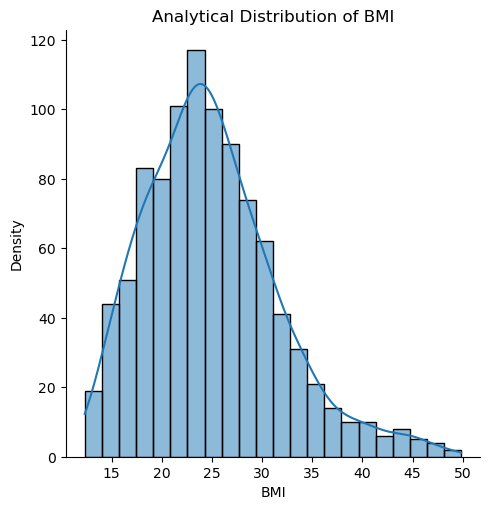

In [25]:

sns.displot(data['BMI'], kde=True)
plt.title('Analytical Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()



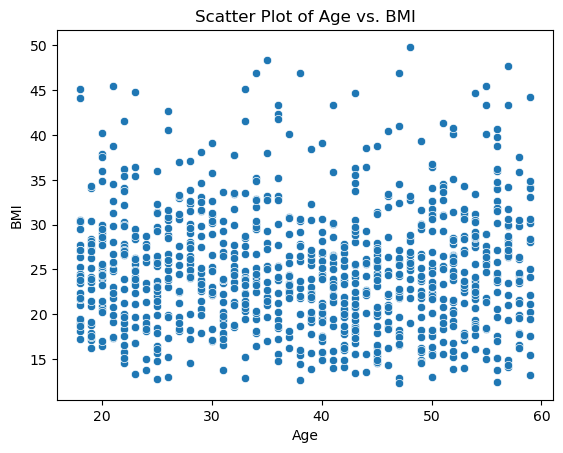

In [27]:

sns.scatterplot(x='Age', y='BMI', data=data)
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


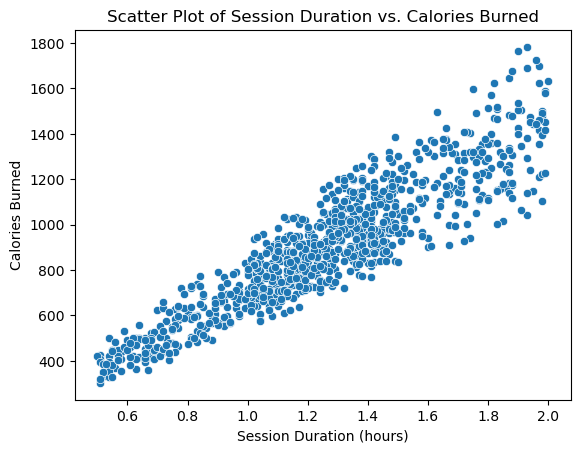

In [29]:
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=data)
plt.title('Scatter Plot of Session Duration vs. Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

In [31]:

correlation_age_bmi = data[['Age', 'BMI']].corr().iloc[0, 1]
correlation_session_calories = data[['Session_Duration (hours)', 'Calories_Burned']].corr().iloc[0, 1]
print(f"Pearson's correlation coefficient (Age vs. BMI): {correlation_age_bmi}")
print(f"Pearson's correlation coefficient (Session Duration vs. Calories Burned): {correlation_session_calories}")

Pearson's correlation coefficient (Age vs. BMI): -0.013691370282822085
Pearson's correlation coefficient (Session Duration vs. Calories Burned): 0.9081403755270134


In [33]:

t_stat, p_value = stats.ttest_ind(long_session.dropna(), short_session.dropna())
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


T-test results: t-statistic = 33.55109193972389, p-value = 1.715516348654719e-164


In [37]:

X = data[['Age', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']].dropna()
y = data['Calories_Burned'].dropna()
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1740.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:52:46   Log-Likelihood:                -5934.7
No. Observations:                 973   AIC:                         1.188e+04
Df Residuals:                     969   BIC:                         1.190e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         